In [3]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

x, y = make_blobs(random_state=42)

print('특성 데이터 크기:', x.shape)
print('특성 데이터 타입:', type(x))
print('특성 데이터 값:\n', x[:5])
print('클래스 값:\n', y)

특성 데이터 크기: (100, 2)
특성 데이터 타입: <class 'numpy.ndarray'>
특성 데이터 값:
 [[-7.72642091 -8.39495682]
 [ 5.45339605  0.74230537]
 [-2.97867201  9.55684617]
 [ 6.04267315  0.57131862]
 [-6.52183983 -6.31932507]]
클래스 값:
 [2 1 0 1 2 1 0 1 1 0 0 2 2 0 0 2 2 0 2 2 0 2 2 0 0 0 1 2 2 2 2 1 1 2 0 0 0
 0 1 1 2 0 1 0 0 1 2 2 2 1 1 1 0 2 2 2 0 0 1 0 2 1 2 1 2 2 1 2 1 1 1 2 2 0
 1 2 1 2 1 1 0 1 0 2 0 0 0 1 0 1 1 1 0 1 0 0 0 1 2 0]


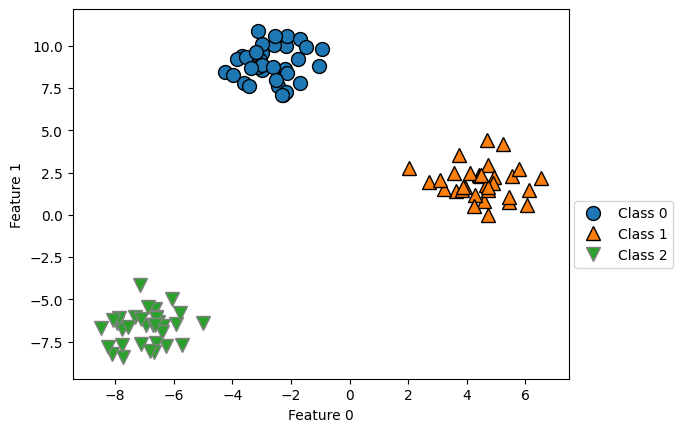

In [4]:
mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2'], loc=(1.01, 0.3))
plt.show()

In [5]:
linear_svm = LinearSVC()
linear_svm.fit(x,y)

coefs = linear_svm.coef_
intercepts = linear_svm.intercept_

print('계수 배열의 크기:', coefs.shape)
print('절편 배열의 크기:', intercepts.shape)
print('계수 배열 확인:\n', coefs)
print('절편 배열 확인:\n', intercepts)

계수 배열의 크기: (3, 2)
절편 배열의 크기: (3,)
계수 배열 확인:
 [[-0.17492238  0.23140524]
 [ 0.47621249 -0.06937726]
 [-0.18914229 -0.20399666]]
절편 배열 확인:
 [-1.07745686  0.13140832 -0.08604811]


-----------------W and b parameters---------------------
-1.0774568608549884
[-0.17492238  0.23140524]
--------------------------------------------------------
-----------------W and b parameters---------------------
0.13140832168146319
[ 0.47621249 -0.06937726]
--------------------------------------------------------
-----------------W and b parameters---------------------
-0.08604810883809896
[-0.18914229 -0.20399666]
--------------------------------------------------------


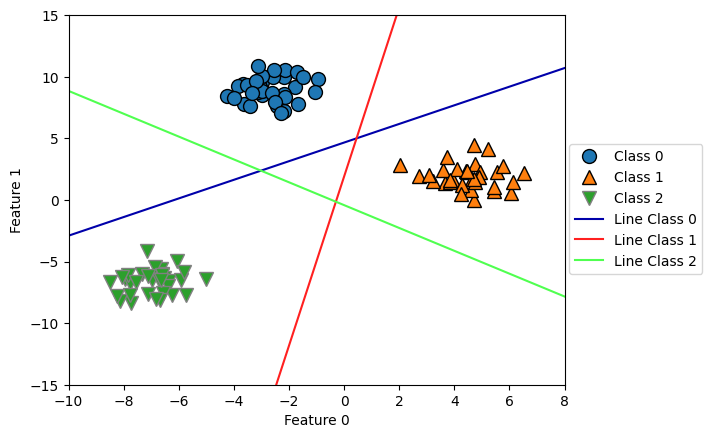

In [6]:
mglearn.discrete_scatter(x[:,0], x[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(coefs, intercepts, mglearn.cm3.colors):
    print('-----------------W and b parameters---------------------')
    print(intercept)
    print(coef)
    print('--------------------------------------------------------')
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-15, 15)
plt.xlim(-10, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line Class 0', 'Line Class 1', 'Line Class 2'], loc=(1.01, 0.3))
                                                                                                

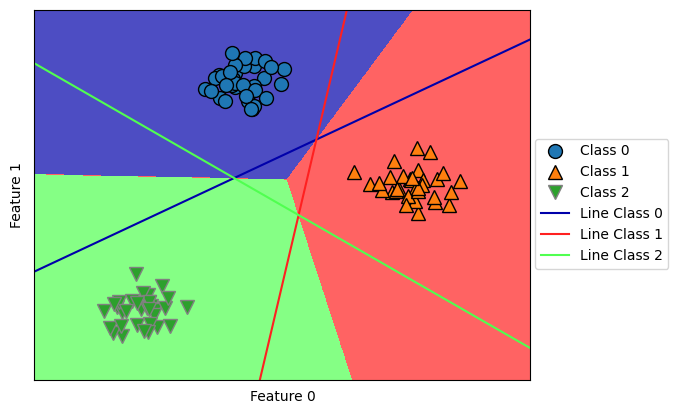

In [7]:
mglearn.plots.plot_2d_classification(linear_svm, x, fill=True, alpha=.7)
mglearn.discrete_scatter(x[:,0], x[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(coefs, intercepts, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line Class 0', 'Line Class 1', 'Line Class 2'], loc=(1.01, 0.3))

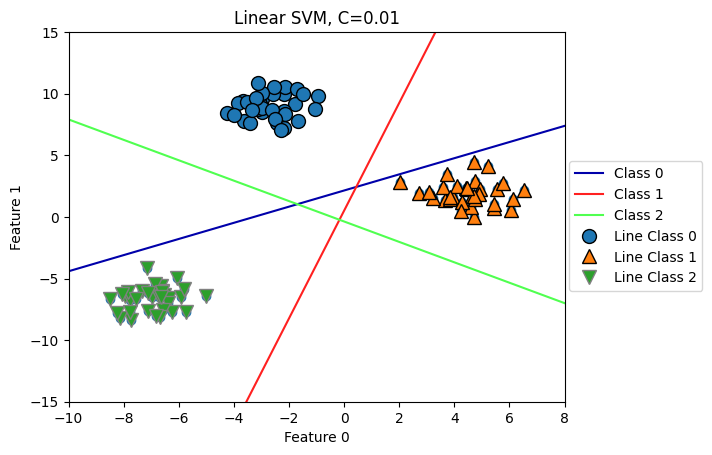

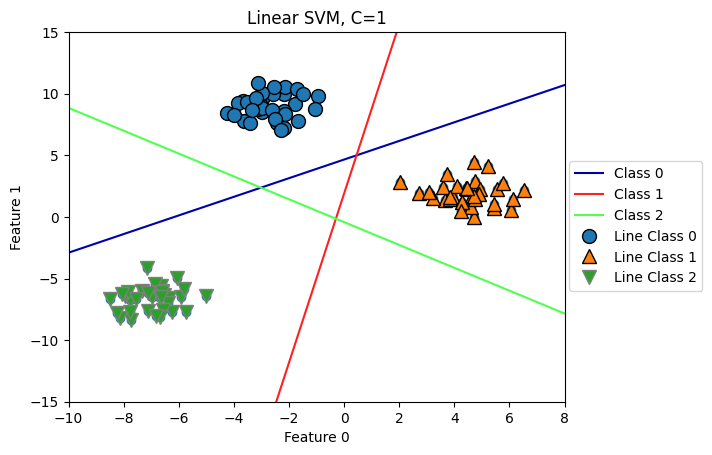

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


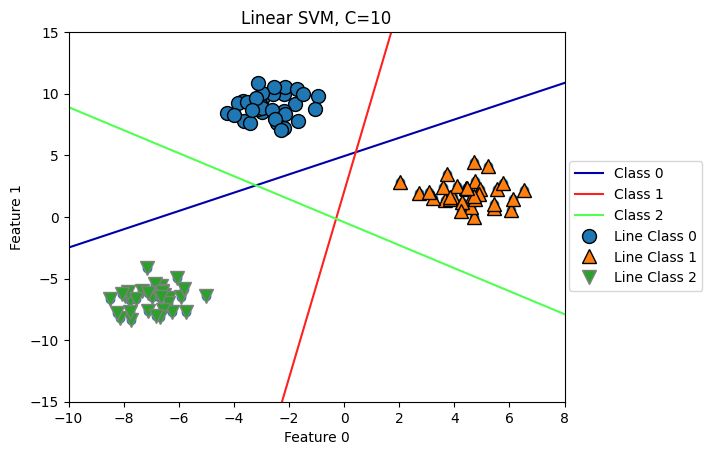

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


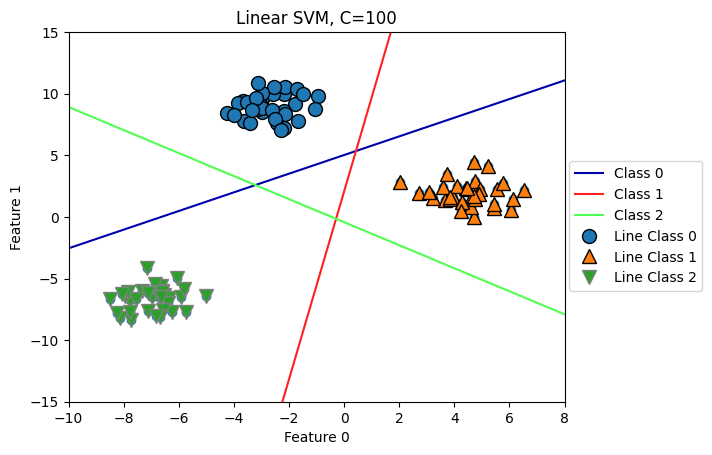

In [8]:
for i, c_value in enumerate([0.01, 1, 10, 100]):
    linear_svm = LinearSVC(C=c_value)
    linear_svm.fit(x,y)
    
    coefs = linear_svm.coef_
    intercepts = linear_svm.intercept_
    
    line = np.linspace(-15,15)
    for coef, intercept, color in zip(coefs, intercepts, mglearn.cm3.colors):
        plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
    mglearn.discrete_scatter(x[:,0], x[:,1], y)
    plt.title(f'Linear SVM, C={format(c_value)}')
    plt.scatter(x[:,0], x[:,1])
    plt.ylim(-15,15)
    plt.xlim(-10, 8)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line Class 0', 'Line Class 1', 'Line Class 2'], loc=(1.01, 0.3))
    plt.show()